# ADAPTIVE TYPE-2 FUZZY APPROACH FOR FILTERING SALT AND PEPPER NOISE IN GRAYSCALE IMAGES


### PYTHON CODE IMPLEMENTATION


In [3]:
import cv2
import numpy as np

In [4]:
# normalization function
def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)
    return out

In [5]:
inp_img=cv2.imread('Lenna.png',0)
img=im2double(inp_img)

In [6]:
# inserting 80% SAP noise
import skimage
im_noise = skimage.util.random_noise(img, mode='s&p', amount=0.6)

In [7]:
p=im_noise.shape
# padding image edges:
im_denoised= (p[0]+20,p[1]+20)
# Image at center with 0.63 as weight
0.63*np.ones(im_denoised)
for m in range(10,p[0]+9):
    for n in range(10,p[1]+9):
        im_denoised=im_noise

In [8]:
# denoised image
im_denoised_pixels=(p[0]+20,p[1]+20)
# mask showing location of noise
im_noised_pixels = (p[0]+20,p[1]+20)
np.zeros(im_denoised_pixels)
np.zeros(im_noised_pixels)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
def kMiddleMean(k,windElem):
    Length_windElem = len(windElem)
#     check odd or even
    if((Length_windElem%2) == 1):
#         for odd
        half_lengh = int((Length_windElem+1)/2)
        factor = 1/(2*k - 1)
        K_middle_vector=windElem.range((half_lengh-k+1),(half_lengh+k-1))
        sum_of_element=K_middle_vector.sum()
            
    else:
#         for even
        half_lengh = 0.5*(Lenght_windElem)
        factor = 1/(2*k)
        K_middle_vector=windElem.range((half_lengh-k+1),(half_lengh+k))
        sum_of_element=K_middle_vector.sum()
            
    mean=factor*sum_of_element
    return mean

In [10]:
import math
import numpy.matlib

In [11]:
def type2_MF(winElem):
    r=len(winElem)
    c=len(winElem[0])
    p=r*c
    H=(1+p)/2
    mu=(1,H)
    np.zeros(mu)
    for q in range(1,H):
#     (5)
        mu[1,q]=kMiddleMean(q,winElem)
#     (7)
    average_mu=((mu.sum())/H)*(np.ones(1,p))
    tmp= abs(winElem-average_mu)
    mu_Mat=np.matlib.repmat(mu,p,1)
    tmp_vector=np.matlib.repmat(winElem,H,1);
#     (6)
    sigma=kMiddleMean(H,tmp)
    if (sigma < 0.0001):
        sigma = 0.0001
#     (4)
    PI= math.exp(-0.5*((tmp_vector-mu_Mat)/sigma))
    np.power(PI,2)
#     (9)
    T_max=(PI.max()).min()
#     (10)
    ave_PI = (PI.sum())/H
    return T_max,ave_PI

In [12]:
import skfuzzy as fuzz

In [13]:
# scanning rows and columns
for i in range(10, p[1]+9):
    for j in range(10, p[0]+9): 
        N_init = 6 
        S_max = 2
        n_gp = N_init
        while (im_denoised[i][j]is 0) or (im_denoised[i][j] is 1):
#   window size M=1
            M=1 
            Rij=[]
            x = range(i-M,i+M)
            y = range(j-M,j+M)                    
            neighborhood_length = (2*M+1)**2
            Rij = (im_denoised[x][y])
            winElem=(Rij,[1,neighborhood_length])
            SubImg= winElem
#    SubImg for pixels around noisy pixel
            T,A=type2_MF(subImg)
            windowLen = len(subImg)
            i = 1
#    GP stores good pixels
            GP=(1,n_gp)
            np.zeros(GP)
            for x in range(1,windlowLen):
#    good pixels
                if (A[x]>=T):
                    GP[i]=subImg[x]
                    i=i+1
                if((subImg(x)!=0) and (subImg(x)!=1)):
                    GP[i]=A[x]
                    i=i+1
                if (i is n_gp+1):
                    break
#    total number of good pixels found:
            neta=len(GP.ravel().nonzero())
#    increase window size if less number of good pixels are found
            if ((neta<n_gp) and (M< S_max)):
                M=M+1
            elif((neta<n_gp) and (M is S_max)):
                n_gp=n_gp-1
                if (n_gp<1):
                    S_max=S_max+1
                    n_gp=1
                    continue
            for k in range (1,(len(GP)/2)):
                mean[k]=kMiddleMean(k,GP)
#    applying primary function, gaussian function
#                  (15)
            mean_G=(mean.sum()/len(GP))
            var_G=abs(GP-mean_G)
            var_G=var_G.max()
            if (var_G<=.01):
                var_G=.01
#                 (16)
            w=fuzz.membership.gaussmf(GP,[var_G,mean_G])
            W=w.sum()
            weighted_G=w*(GP.conj().transpose())
#                 (17)
            im_denoised[i][j]=weighted_G/W

In [14]:
from matplotlib import pyplot as plt

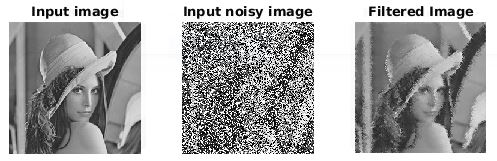

In [19]:
# input image
plt.subplot(131)
plt.axis('off')
plt.title("Input image")
plt.imshow(img)

# noisy image
plt.subplot(132)
plt.axis('off')
plt.title("Input noisy image")
plt.imshow(im_noise)

# dnoised image
plt.subplot(133)
plt.axis('off')
plt.title("Filtered image")
plt.imshow(im_denoised)